# Quickstart for Jupyter-Base Notebook

Un environnement de travail basé sur Jupyter [jupyter/minimal-notebook](https://hub.docker.com/r/jupyter/minimal-notebook/tags).
 cf. <https://github.com/ebpro/jupyter-base> 

 * Dans des notebooks 
   * Programmation Python
   * Utilisation d'un shell Linux
   * Intégration de graphiques (PlantUML)
 * Dans un IDE embarqué (VSCode)
   * Edition de documents LaTeX
   * Développement logiciel classique

L'organisation est très simple : 
  * un seul utilisateur `jovyan`
  * les notebooks se trouvent dans `/home/jovyan/notebooks`
  * l'espace de travail dans `/home/jovyan/work`

Ces répertoires peuvent être préremplis, remplis dynamiquement (Git) ou montés depuis un environement persistant.

## Python

Comme dans tous les notebooks Jupyter les cellules Python partagent le même interprète.

In [1]:
text="hello"

In [2]:
for i in range(5,0,-1):
    print(i)
print(text.upper())

5
4
3
2
1
HELLO


## Bash

Des commandes spéciales (magics) en ligne (`%`) ou par cellule sont disponibles (`%%`). 

i.e `%%bash` pour exécuter des commandes dans un shell Bash.

In [3]:
%%bash
date +"%Y-%m-%d %H:%M:%S"
uname -a

2023-04-04 16:40:15
Linux 36b718fc8a80 5.15.82-0-virt #1-Alpine SMP Mon, 12 Dec 2022 09:15:17 +0000 aarch64 aarch64 aarch64 GNU/Linux


## Conda

Les environnements conda sont supportés et peuvent persistants (`/home/jovyan/work/my-conda-envs`). 

L'utilisation de conda est possible et si un noyau jupyter est installé dans un environnement (`ipykernel` pour Python), il est possible d'utiliser comme noyau d'un notebook.

Les environnements "personnels" sont stockés dans `/home/jovyan/work/my-conda-envs` et peuvent donc être persistants. 

In [5]:
%%bash
conda create --yes --quiet \
  --name hello-test \
  python=3.10 \
   ipykernel

Solving environment: ...working... done

## Package Plan ##

  environment location: /home/jovyan/work/my-conda-envs/hello-test

  added / updated specs:
    - ipykernel
    - python=3.10


The following NEW packages will be INSTALLED:

  _openmp_mutex      conda-forge/linux-aarch64::_openmp_mutex-4.5-2_gnu 
  asttokens          conda-forge/noarch::asttokens-2.2.1-pyhd8ed1ab_0 
  backcall           conda-forge/noarch::backcall-0.2.0-pyh9f0ad1d_0 
  backports          conda-forge/noarch::backports-1.0-pyhd8ed1ab_3 
  backports.functoo~ conda-forge/noarch::backports.functools_lru_cache-1.6.4-pyhd8ed1ab_0 
  bzip2              conda-forge/linux-aarch64::bzip2-1.0.8-hf897c2e_4 
  ca-certificates    conda-forge/linux-aarch64::ca-certificates-2022.12.7-h4fd8a4c_0 
  comm               conda-forge/noarch::comm-0.1.3-pyhd8ed1ab_0 
  debugpy            conda-forge/linux-aarch64::debugpy-1.6.6-py310hbc44c02_0 
  decorator          conda-forge/noarch::decorator-5.1.1-pyhd8ed1ab_0 
  executing    

L'environnement `hello-test` est maintenant utilisable dans un shell ou comme noyau d'un notebook (cf. "new launcher").

In [16]:
%%bash
source activate hello-test
python --version

Python 3.10.10


In [17]:
%%bash
python --version

Python 3.10.10


In [7]:
import sys

print(sys.version)

3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 19:56:21) [GCC 11.3.0]


## Git

Disponible :
  * depuis l'interface pour les commandes et la comparaison de notebooks
  * classiquement en ligne de commande (`.ssh` dans `~/work`).

In [18]:
%%bash 
git --version

git version 2.34.1


In [20]:
%%bash
git clone https://github.com/ebpro/sample-python.git \
         /home/jovyan/work/github/ebpro/sample-python

cd /home/jovyan/work/github/ebpro/sample-python
python -m pip install .

fatal: destination path '/home/jovyan/work/github/ebpro/sample-python' already exists and is not an empty directory.


Processing /home/jovyan/work/github/ebpro/sample-python
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sample-python: filename=sample_python-0.0.1-py3-none-any.whl size=2624 sha256=112542c79ada498e2dc4a6f3855926d710f0017355aeb2428f85d4ee93ed948e
  Stored in directory: /home/jovyan/work/var/cache/buildkit/pip/wheels/fb/0f/29/7f3d2969175c3d9e9bf1ea9c7d948f78a74876e3447c5bfe55
Successfully built sample-python
  Attempting uninstall: sample-python
    Found existing installation: sample-python 0.0.1
    Uninstalling sample-python-0.0.1:
      Successfully uninstalled sample-python-0.0.1


In [21]:
import hello.helloworld

hello.helloworld.hello()

Hello World!


Comme la mise à jour de code source fourni aux étudiants peut être complexe surtout s'ils ont fait des modifications, l'outil [gitpuller](https://github.com/jupyterhub/nbgitpuller) est proposé pour régler la plupart des conflits avec des a priori raisonnables. 

In [22]:
%%bash
gitpuller https://github.com/ebpro/sample-python.git develop /home/jovyan/work/github/ebpro/sample-python

$ git fetch

$ git reset --mixed

$ git -c user.email=nbgitpuller@nbgitpuller.link -c user.name=nbgitpuller merge -Xours origin/develop

Already up to date.



## VSCode

L'IDE Visual Studio Code ([vscode](https://code.visualstudio.com/)) est fourni avec quelques extensions de base. Il est accessible par le launcher et depuis les liens markdown.

Par exemple, il est possible d'éditer et d'exécuter le clone local du projet Python précédent [/home/jovyan/work/github/ebpro/sample-python](/code-server/?folder=/home/jovyan/work/github/ebpro/sample-python).


## LateX 

La distribution complète [TexLive](https://www.tug.org/texlive/) est fournie.

Il est donc possible de compiler des documents :

In [25]:
%%bash
gitpuller https://github.com/ebpro/sample-latex.git \
     develop /home/jovyan/work/github/ebpro/sample-latex && \
cd /home/jovyan/work/github/ebpro/sample-latex && \

latexmk -xelatex -quiet sample.tex 2>&1 > /tmp/latex_build.log

$ git fetch

$ git reset --mixed

$ git -c user.email=nbgitpuller@nbgitpuller.link -c user.name=nbgitpuller merge -Xours origin/develop

Already up to date.

Rc files read:
  /etc/LatexMk


et d'utiliser vscode pour l'édition : [/home/jovyan/notebooks/latex](/code-server/?folder=/home/jovyan/work/github/ebpro/sample-latex)

## Diagrammes

L'intégration de diagrammes dont ceux d'UML est possible avec [PlantUML](https://plantuml.com/fr/).

In [26]:
import iplantuml

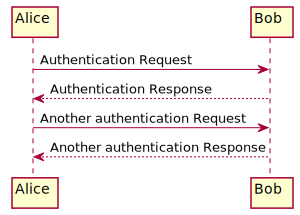

In [28]:
%%plantuml --jar

@startuml
Alice -> Bob: Authentication Request
Bob --> Alice: Authentication Response

Alice -> Bob: Another authentication Request
Alice <-- Bob: Another authentication Response
@enduml

```{uml}
Alice -> Bob: Hi!
Alice <- Bob: How are you?
```